In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
group_1 = pd.read_csv('./genes/group_1_genes.csv')
group_2 = pd.read_csv('./genes/group_2_genes.csv')
group_3 = pd.read_csv('./genes/group_3_genes.csv')
group_4 = pd.read_csv('./genes/group_4_genes.csv')

In [3]:
miRNA_clusters = pd.read_csv('miRNA_clusters.csv')


In [4]:
group_1.columns

print(f'Shape of group 1: {group_1.shape}')
print(f'Shape of group 2: {group_2.shape}')
print(f'Shape of group 3: {group_3.shape}')
print(f'Shape of group 4: {group_4.shape}')

Shape of group 1: (11, 8)
Shape of group 2: (343, 10)
Shape of group 3: (72, 8)
Shape of group 4: (998, 11)


In [5]:
group_1_genes = group_1['Gene Symbol'].tolist()
group_2_genes = group_2['Gene Symbol'].tolist()
group_3_genes = group_3['Gene Symbol'].tolist()
group_4_genes = group_4['Gene Symbol'].tolist()

In [6]:
print("group_1 genes:", " ".join(group_1_genes), "\n")
print("group_2 genes:", " ".join(group_2_genes), "\n")
print("group_3 genes:", " ".join(group_3_genes), "\n")
print("group_4 genes:", " ".join(group_4_genes), "\n")

group_1 genes: DAZAP2 DOT1L DPY19L1 FAM129B FXR2 KDELR1 KIAA1456 RBM23 SLC7A5 SUMO1 ZMYM1 

group_2 genes: MAPKAPK2 ACACA AP2M1 ARHGEF18 ATXN2 BCL7B BRD2 C10orf76 CALR CAPS CASKIN2 CCPG1 CD276 CDC37L1 CELF1 CHCHD10 CHERP CKS2 COX6C CTDNEP1 CTTN CYP11A1 CYP4A11 CYP4A22 DCX DUSP3 ELFN2 FTSJ3 FZR1 GALNT4 GFER GMNN HIST1H2AE HIST2H2BE HIST3H3 HOXA7 KMT2A KMT2D LLGL1 LURAP1L LY6E MCFD2 MDFI MDK MEX3A MFRP MLLT1 MOB1A MPP2 MTRNR2L5 MZT1 NIF3L1 NLRP6 NUCB1 NUP62 OTUD5 OTUD7B P2RY2 PHYKPL PKD1 POC1B-GALNT4 PPL PPP6R1 PRSS8 PTGES3L RHEBP1 RNF40 RPAP1 RPL22 RPP40 SAA1 SCAMP4 SCD SETD1B SNX12 SOWAHA SOX12 TARDBP TESPA1 TLN1 YTHDF3 ZNF195 ABCC5 ABL1 ACOX1 ACTB ADGRL1 AKT1S1 ALDH6A1 ANP32B ARHGAP18 ARL6IP1 ARL8A ASNA1 ATG9A ATXN7L3 AVL9 B4GALT1 BAK1 BARHL1 BCL2L1 BCL2L12 BCL7A BUB1 C11orf58 C12orf49 C16orf58 C3orf36 C6orf223 CACUL1 CANX CASP16P CAVIN1 CBX6 CC2D1B CCNT1 CDCA4 CDH6 CDK9 CEP97 CHAC1 CLASP1 CLIC5 COL1A1 COL4A3BP COX6B1 CSDE1 CSTF2 DAB2IP DBN1 DCAF7 DCP2 DDX39B DDX3X DLC1 DLGAP3 DNLZ DO

# Genecards Pathway and Disease Analysis

In [7]:
group_1_gc = pd.ExcelFile('./gene_cards/group_1_gc.xlsx')
group_2_gc = pd.ExcelFile('./gene_cards/group_2_gc.xlsx')
group_3_gc = pd.ExcelFile('./gene_cards/group_3_gc.xlsx')
group_4_gc = pd.ExcelFile('./gene_cards/group_4_gc.xlsx')

group_1_pathways = pd.read_excel(group_1_gc, 'Pathways', skiprows=18)
group_2_pathways = pd.read_excel(group_2_gc, 'Pathways', skiprows=18)
group_3_pathways = pd.read_excel(group_3_gc, 'Pathways', skiprows=18)
group_4_pathways = pd.read_excel(group_4_gc, 'Pathways', skiprows=18)

group_1_diseases = pd.read_excel(group_1_gc, 'Diseases', skiprows=18)
group_2_diseases = pd.read_excel(group_2_gc, 'Diseases', skiprows=18)
group_3_diseases = pd.read_excel(group_3_gc, 'Diseases', skiprows=18)
group_4_diseases = pd.read_excel(group_4_gc, 'Diseases', skiprows=18)

In [8]:
group_1_pathways.columns

Index(['Score', 'SuperPath Name', '# SuperPath Total Genes',
       '# SuperPath Matched Genes', 'Matched Genes (Symbols)', 'Evidence URL'],
      dtype='object')

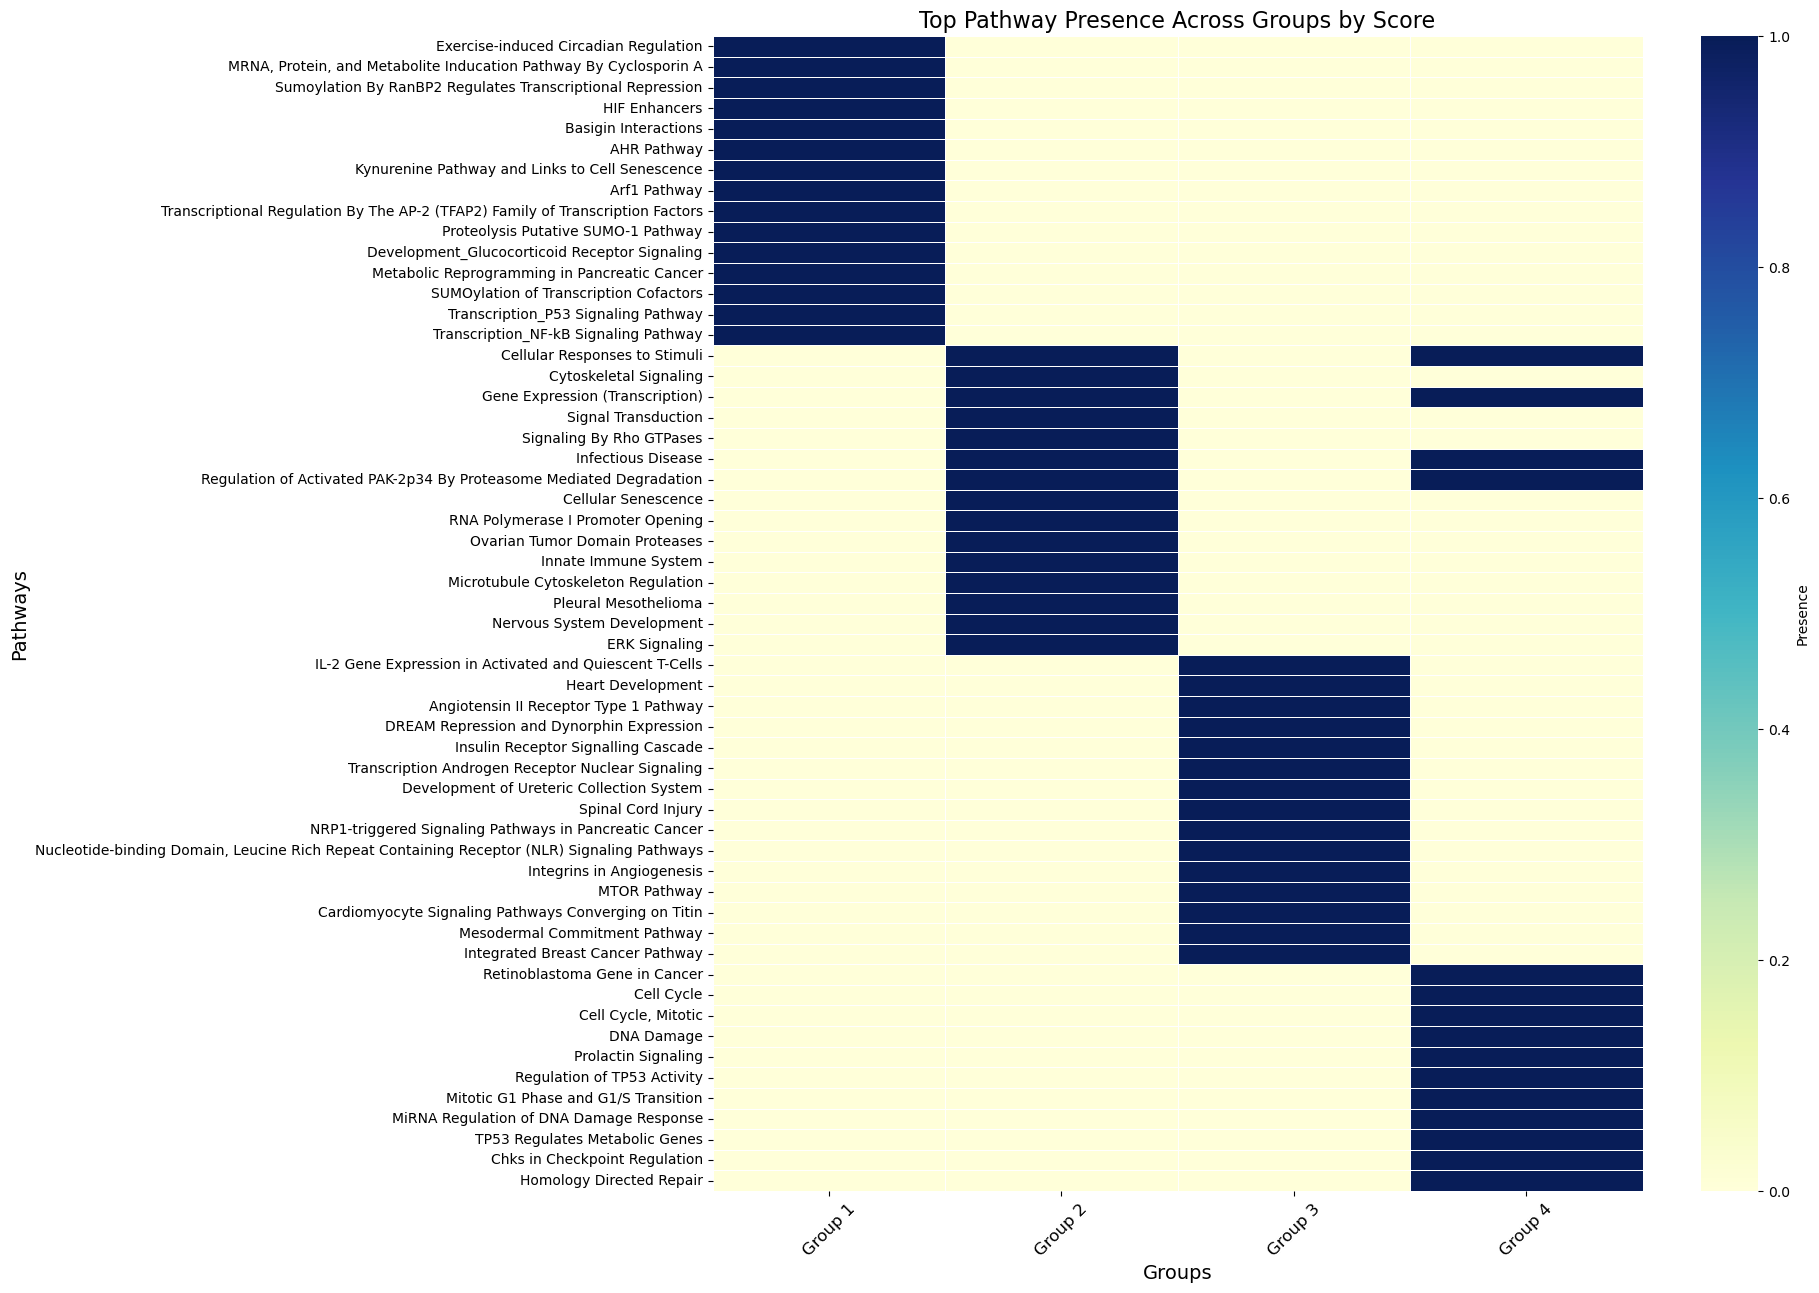

Top pathways for Group 1:
Exercise-induced Circadian Regulation
MRNA, Protein, and Metabolite Inducation Pathway By Cyclosporin A
Sumoylation By RanBP2 Regulates Transcriptional Repression
HIF Enhancers
Basigin Interactions
AHR Pathway
Kynurenine Pathway and Links to Cell Senescence
Arf1 Pathway
Transcriptional Regulation By The AP-2 (TFAP2) Family of Transcription Factors
Proteolysis Putative SUMO-1 Pathway
Development_Glucocorticoid Receptor Signaling
Metabolic Reprogramming in Pancreatic Cancer
SUMOylation of Transcription Cofactors
Transcription_P53 Signaling Pathway
Transcription_NF-kB Signaling Pathway 

Top pathways for Group 2:
Cellular Responses to Stimuli
Cytoskeletal Signaling
Gene Expression (Transcription)
Signal Transduction
Signaling By Rho GTPases
Infectious Disease
Regulation of Activated PAK-2p34 By Proteasome Mediated Degradation
Cellular Senescence
RNA Polymerase I Promoter Opening
Ovarian Tumor Domain Proteases
Innate Immune System
Microtubule Cytoskeleton Regulati

In [17]:
# Filter top 15 pathways by 'Score' for each group
top_group_1_pathways = group_1_pathways.nlargest(15, 'Score')
top_group_2_pathways = group_2_pathways.nlargest(15, 'Score')
top_group_3_pathways = group_3_pathways.nlargest(15, 'Score')
top_group_4_pathways = group_4_pathways.nlargest(15, 'Score')

# Combine top pathways from all groups and drop duplicates
top_pathways = pd.concat([top_group_1_pathways, top_group_2_pathways, top_group_3_pathways, top_group_4_pathways]).drop_duplicates()

# Create a binary matrix to indicate the presence of top pathways in each group
top_pathway_presence = pd.DataFrame(index=top_pathways['SuperPath Name'].unique())
top_pathway_presence['Group 1'] = top_pathway_presence.index.isin(top_group_1_pathways['SuperPath Name']).astype(int)
top_pathway_presence['Group 2'] = top_pathway_presence.index.isin(top_group_2_pathways['SuperPath Name']).astype(int)
top_pathway_presence['Group 3'] = top_pathway_presence.index.isin(top_group_3_pathways['SuperPath Name']).astype(int)
top_pathway_presence['Group 4'] = top_pathway_presence.index.isin(top_group_4_pathways['SuperPath Name']).astype(int)

# Plot heatmap with enhancements for top pathways by score across groups
plt.figure(figsize=(15, 15))
sns.heatmap(top_pathway_presence, cmap="YlGnBu", cbar_kws={'label': 'Presence'}, linewidths=.5)
plt.title('Top Pathway Presence Across Groups by Score', fontsize=16)
plt.xlabel('Groups', fontsize=14)
plt.ylabel('Pathways', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=10)
plt.show()

# Print top pathways for each group
print("Top pathways for Group 1:")
print('\n'.join(top_group_1_pathways['SuperPath Name'].tolist()), '\n')

print("Top pathways for Group 2:")
print('\n'.join(top_group_2_pathways['SuperPath Name'].tolist()), '\n')

print("Top pathways for Group 3:")
print('\n'.join(top_group_3_pathways['SuperPath Name'].tolist()), '\n')

print("Top pathways for Group 4:")
print('\n'.join(top_group_4_pathways['SuperPath Name'].tolist()), '\n')


Binary matrix data types:
Group 1    int64
Group 2    int64
Group 3    int64
Group 4    int64
dtype: object

Binary matrix head:
                               Group 1  Group 2  Group 3  Group 4
Orofacial Cleft 10                   1        0        0        0
Acute Promyelocytic Leukemia         1        1        1        1
Orofacial Cleft 4                    1        0        0        0
Autism                               1        1        1        1
Amyotrophic Lateral Sclerosis        1        1        1        1

Binary matrix summary:
           Group 1      Group 2      Group 3      Group 4
count  5872.000000  5872.000000  5872.000000  5872.000000
mean      0.009366     0.508515     0.166042     0.842132
std       0.096334     0.499970     0.372150     0.364648
min       0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000     1.000000
50%       0.000000     1.000000     0.000000     1.000000
75%       0.000000     1.000000     0.000000

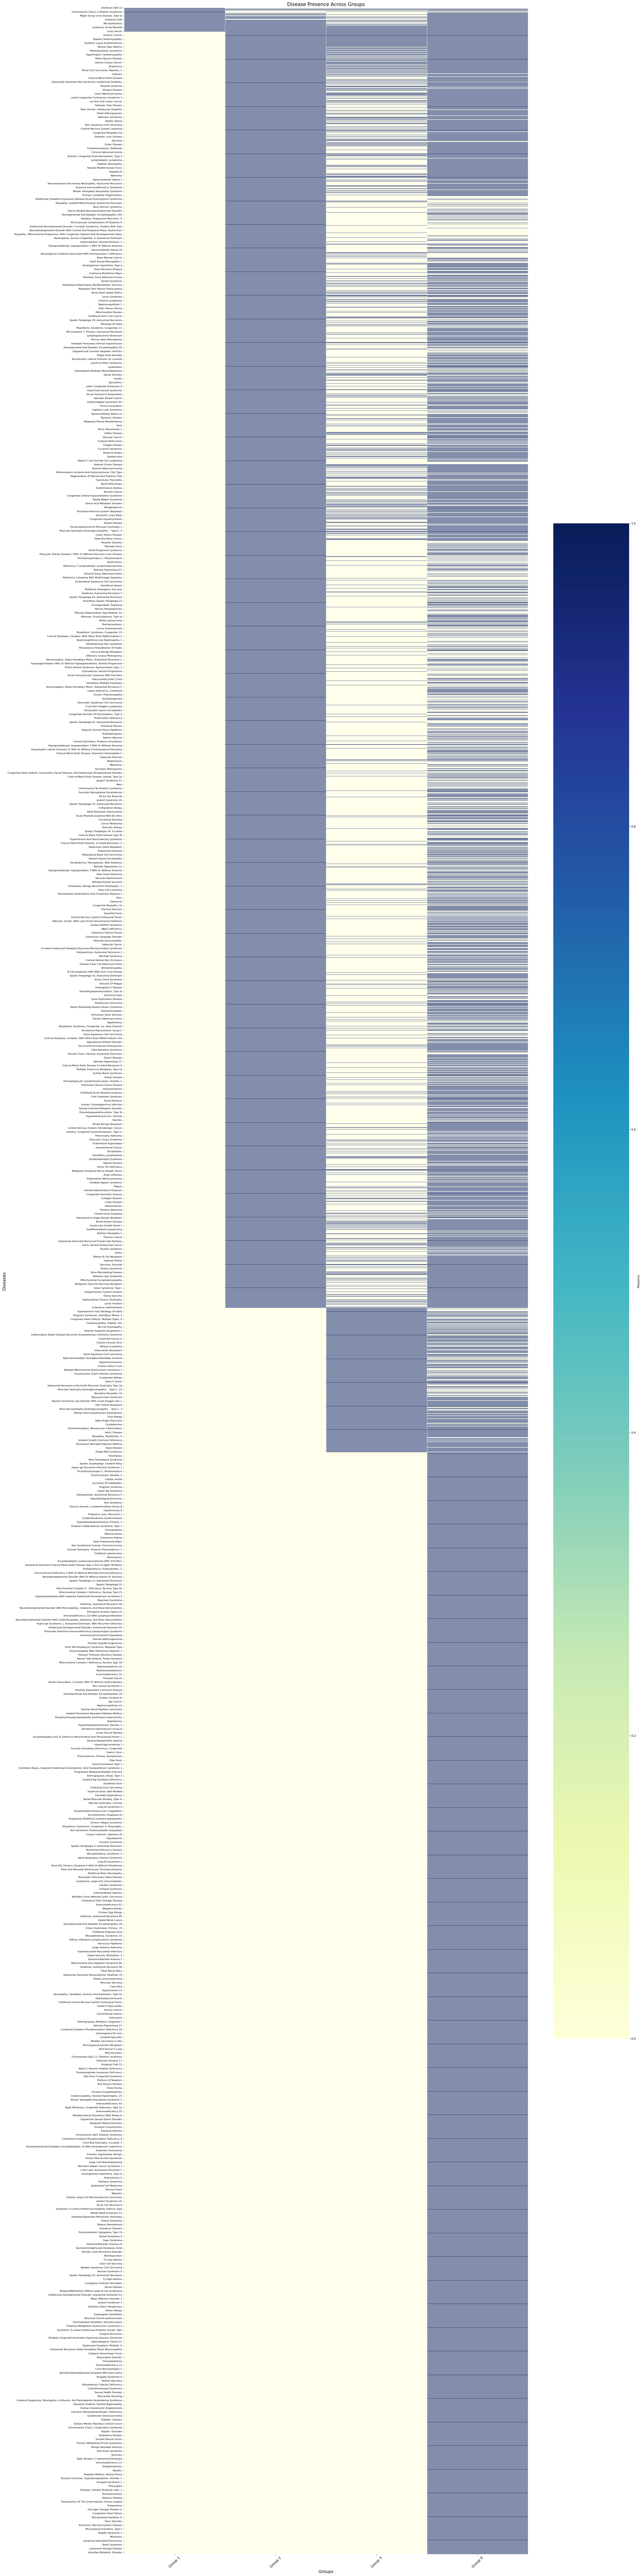

In [10]:
# Combine all diseases and drop duplicates
diseases = pd.concat([group_1_diseases, group_2_diseases, group_3_diseases, group_4_diseases], axis=0)
diseases = diseases.drop_duplicates()

# Create a binary matrix to indicate the presence of diseases in each group
disease_presence = pd.DataFrame(index=diseases['Name'].unique())
disease_presence['Group 1'] = disease_presence.index.isin(group_1_diseases['Name']).astype(int)
disease_presence['Group 2'] = disease_presence.index.isin(group_2_diseases['Name']).astype(int)
disease_presence['Group 3'] = disease_presence.index.isin(group_3_diseases['Name']).astype(int)
disease_presence['Group 4'] = disease_presence.index.isin(group_4_diseases['Name']).astype(int)

# Remove rows with all zeros to reduce sparsity
disease_presence = disease_presence[(disease_presence.T != 0).any()]

# Debugging statements
print("\nBinary matrix data types:")
print(disease_presence.dtypes)

print("\nBinary matrix head:")
print(disease_presence.head())

print("\nBinary matrix summary:")
print(disease_presence.describe())

# Ensure the matrix contains the expected values (0 and 1)
unique_values = disease_presence.values.flatten()
print("\nUnique values in the binary matrix:", set(unique_values))

# Plot a smaller subset of the data for debugging
subset_disease_presence = disease_presence.head(100)

plt.figure(figsize=(30, 120))  # Increase figure size significantly
sns.heatmap(disease_presence, cmap="YlGnBu", cbar_kws={'label': 'Presence'}, linewidths=.5, vmin=0, vmax=1)
plt.title('Disease Presence Across Groups', fontsize=16)
plt.xlabel('Groups', fontsize=14)
plt.ylabel('Diseases', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=8)  # Adjust font size for y-tick labels
plt.tight_layout()
plt.show()

In [11]:
group_1_diseases.columns

Index(['Score', 'Name', 'Disease categories', '# Total Genes',
       '# Matched Genes', 'Matched Genes (Symbols)', 'Evidence URL',
       'Genetic Associations', 'Matched Genes for Genetic Associations',
       'Diferentially Expressed Genes in Tissue Samples',
       'Genes Matched to Differentially Expressed Genes'],
      dtype='object')